URL Dashboard: https://public.tableau.com/views/Harits_Yugioh_H8_P0M1/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

---
## A. Introduction
---

Nama: Harits Ghiffari Hanif

---
## B. Problem Statement
---

#### Intermezzo Kartu Yugioh
---
Monster di Yu-Gi-Oh! dikategorikan berdasarkan warna background frame kartunya. Hijau untuk Spell, ungu kemerahan untuk Trap, dan sisanya Monster.

Monster memiliki ATK, DEF, Attribute, Level, dan Race. Race untuk monster disebut secara resmi sebagai Type. Seperti Dragon-Type monster dan Beast-Type Monster.

Kartu Monster yang bukan Effect, tidak memiliki kemampuan atau disebut "Vanilla". Hal ini bisa diperiksa di kolom Truly_have_Effect dengan 0 menunjukkan tidak memiliki efek.

Kartu Pendulum Monster memiliki fitur Pendulum Scale dan Pendulum Effect.

Kartu Link Monster memiliki anak panah seperti pada mata angin yang jumlahnya diberikan pada kolom Link_Value.

Spell dan Trap tidak memiliki ciri-ciri di atas yang ada pada Monster.

Spell dan Trap dikelompokkan menjadi Normal, Continuous, dan Equip untuk keduanya, tambahan Field dan Quick-Play untuk Spell, dan tambahan Counter untuk Trap. Tercantum di kolom Race.

Ban Status kartu Yugioh ada 3:
- Banned - Kartu tidak boleh dimainkan
- Limited - Kartu hanya boleh ada 1 di dalam Deck
- Semi-Limited - Kartu hanya boleh ada 2 di dalam Deck

Jika tidak ada Ban Status, kartu boleh ada 3 di dalam Deck.

---

Yu-Gi-Oh! adalah permainan kartu bergambar yang dimainkan oleh 2 orang. Tujuan permainan ini adalah mengalahkan lawan dalam Duel dengan membuat Life Point lawan menjadi 0 atau melalui efek kartu. Karena Yu-Gi-Oh! sudah ada sejak 1999, saya ingin mengetahui bagaimana ragam kartu-kartu Yu-Gi-Oh! yang bisa dimainkan di format OCG (Official Card Game) sampai dengan waktu pengambilan data (14 Agustus 2023).

Berikut adalah pertanyaan-pertanyaan yang ingin dijawab dari dataset yang diambil.

1. Bagaimana perbandingan jenis tipe kartu Yu-Gi-Oh! yang ada hingga 14 Agustus 2023?
2. Bagaimana perbandingan tipe-tipe Monster per Attribute?
3. Apakah kartu-kartu termahal adalah kartu-kartu yang relatif baru dirilis?
4. Berapa rata-rata banyak kartu dalam satu Archetype?
5. Bagaimana perbandingan jumlah kartu dari setiap *rarity*?
6. Bagaimana persebaran level/rank monster di Yu-Gi-Oh! ?

---
## C. Data Loading & Cleaning
---

In [1]:
import pandas as pd

Data kartu Yu-Gi-Oh! di format OCG yang ada di https://ygoprodeck.com per 14 Agustus 2023.

Data diambil dari API YGOPRODeck dengan mengikuti instruksi *page* berikut. https://ygoprodeck.com/api-guide/

Untuk penjelasan *dictionary key* yang didapatkan dari API, bisa dilihat di https://ygoprodeck.com/api-guide/ pada bagian **Response Information**.

URL yang digunakan di Postman untuk mendapatkan datanya adalah https://db.ygoprodeck.com/api/v7/cardinfo.php?format=ocg&misc=yes

Response Postman kemudian disimpan di *local*.

Dari data yang didapatkan, yang akan digunakan sebagai kolom adalah *id, name, type, desc, atk, def, level, race, attribute, archetype, scale, linkval, card_sets, card_prices, banlist_info* dan *misc_info*.

Dari *banlist_info* hanya diambil informasi *ban_ocg*. Dari *misc_info* diambil *ocg_date* dan *has_effect*.

Dari *card_sets* diambil *set_name, set_code, set_rarity,* dan *set_rarity_code*.

Dari *card_prices* diambil semuanya. Untuk *cardmarket_price*, mata uangnya adalah Euro. Sedangkan sisanya menggunakan mata uang USD.

In [2]:
yugioh = pd.read_json('ygoprodeck_api_response_ocg_misc')

In [3]:
len(yugioh)

12430

Akan dibuat 3 dataframe. Dataframe untuk informasi kartu, dataframe rarity dan asal set kartu, dan dataframe untuk harga termurah kartu yang dicatat oleh YGOPRODeck.

---
### 1. Card Information Dataframe

Membuat dataframe untuk informasi kartu Yu-Gi-Oh! .

In [4]:
card_id = []
card_name = []
card_type = []
card_effect = []
card_arch = []
card_race = []
mons_atk = []
mons_def = []
mons_lvl = []
mons_attrb = []
link_val = []
pend_scale = []
card_ban = []
konami_id = []
ocg_rls_date = []
card_has_effect = []

for i in yugioh['data']:
    try: #card id
        card_id.append(dict(i)['id'])
    except:
        card_id.append(None)

    try: #card name
        card_name.append(dict(i)['name'])
    except:
        card_name.append(None)

    try: #card type monster/spell/trap
        card_type.append(dict(i)['type'])
    except:
        card_type.append(None)

    try: #monster type, spell/trap type (normal, equip, quickplay, field, counter, etc)
        card_race.append(dict(i)['race'])
    except:
        card_race.append(None)

    try: #card archetype
        card_arch.append(dict(i)['archetype'])
    except:
        card_arch.append(None)

    try: #card effect
        card_effect.append(dict(i)['desc'])
    except:
        card_effect.append(None)

    try: #monster attack
        mons_atk.append(dict(i)['atk'])
    except:
        mons_atk.append(None)

    try: #monster defense
        mons_def.append(dict(i)['def'])
    except:
        mons_def.append(None)

    try: #monster level/rank
        mons_lvl.append(dict(i)['level'])
    except:
        mons_lvl.append(None)

    try: #monster attribute
        mons_attrb.append(dict(i)['attribute'])
    except:
        mons_attrb.append(None)

    try: #pendulum monster scale
        pend_scale.append(dict(i)['scale'])
    except:
        pend_scale.append(None)

    try: #monster link value
        link_val.append(dict(i)['linkval'])
    except:
        link_val.append(None)

    try: #ban list status
        card_ban.append(dict(i)['banlist_info']['ban_ocg'])
    except:
        card_ban.append(None)
    
    try: #date card released in OCG
        ocg_rls_date.append(dict(dict(i)['misc_info'][0])['ocg_date'])
    except:
        ocg_rls_date.append(None)

    try: #card konami id
        konami_id.append(dict(dict(i)['misc_info'][0])['konami_id'])
    except:
        konami_id.append(None)

    try: #check whether a card truly have an effect or not
        card_has_effect.append(dict(dict(i)['misc_info'][0])['has_effect'])
    except:
        card_has_effect.append(None)

card_df = pd.DataFrame({'Card_ID':card_id,
                        'Name':card_name,
                        'Archetype':card_arch,
                        'Effect':card_effect,
                        'Type':card_type,
                        'Race':card_race,
                        'ATK':mons_atk,
                        'DEF':mons_def,
                        'Level/Rank':mons_lvl,
                        'Attribute':mons_attrb,
                        'Link_Value':link_val,
                        'Pendulum_Scale':pend_scale,
                        'Ban_Status':card_ban,
                        'OCG_Release_Date':ocg_rls_date,
                        'Konami_ID':konami_id,
                        'Truly_have_Effect':card_has_effect
})
card_df

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
0,34541863,"""A"" Cell Breeding Device",Alien,"During each of your Standby Phases, put 1 A-Co...",Spell Card,Continuous,NaN,NaN,NaN,None,NaN,NaN,None,2007-02-15,7128.0,1
1,64163367,"""A"" Cell Incubator",Alien,Each time an A-Counter(s) is removed from play...,Spell Card,Continuous,NaN,NaN,NaN,None,NaN,NaN,None,2007-07-21,7315.0,1
2,91231901,"""A"" Cell Recombination Device",Alien,Target 1 face-up monster on the field; send 1 ...,Spell Card,Quick-Play,NaN,NaN,NaN,None,NaN,NaN,None,2016-07-09,12653.0,1
3,73262676,"""A"" Cell Scatter Burst",Alien,"Select 1 face-up ""Alien"" monster you control. ...",Spell Card,Quick-Play,NaN,NaN,NaN,None,NaN,NaN,None,2006-11-16,6994.0,1
4,98319530,"""Infernoble Arms - Almace""",Noble Knight,While this card is equipped to a monster: You ...,Spell Card,Equip,NaN,NaN,NaN,None,NaN,NaN,None,2023-04-22,18843.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,2648201,ZW - Sleipnir Mail,Utopia,"You can target 1 ""Utopia"" monster you control;...",Effect Monster,Beast,1000.0,1000.0,4.0,LIGHT,NaN,NaN,None,2013-08-05,10844.0,1
12426,95886782,ZW - Sylphid Wing,Utopia,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Effect Monster,Beast,800.0,1600.0,4.0,LIGHT,NaN,NaN,None,2021-06-12,16419.0,1
12427,81471108,ZW - Tornado Bringer,Utopia,"You can target 1 ""Utopia"" monster you control;...",Effect Monster,Dragon,1300.0,1800.0,5.0,WIND,NaN,NaN,None,2012-11-17,10365.0,1
12428,18865703,ZW - Ultimate Shield,Utopia,When this card is Normal or Special Summoned: ...,Effect Monster,Aqua,0.0,2000.0,4.0,EARTH,NaN,NaN,None,2012-11-17,10366.0,1


#### Pengecekan Dataset

In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Card_ID            12430 non-null  int64  
 1   Name               12430 non-null  object 
 2   Archetype          7260 non-null   object 
 3   Effect             12430 non-null  object 
 4   Type               12430 non-null  object 
 5   Race               12430 non-null  object 
 6   ATK                8137 non-null   float64
 7   DEF                7757 non-null   float64
 8   Level/Rank         7757 non-null   float64
 9   Attribute          8137 non-null   object 
 10  Link_Value         380 non-null    float64
 11  Pendulum_Scale     332 non-null    float64
 12  Ban_Status         188 non-null    object 
 13  OCG_Release_Date   12430 non-null  object 
 14  Konami_ID          12173 non-null  float64
 15  Truly_have_Effect  12430 non-null  int64  
dtypes: float64(6), int64(2

In [6]:
# Mengubah kolom OCG_Release_Date menjadi dtype datetime
card_df['OCG_Release_Date'] =  pd.to_datetime(card_df['OCG_Release_Date'], format='%Y-%m-%d')

In [7]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Card_ID            12430 non-null  int64         
 1   Name               12430 non-null  object        
 2   Archetype          7260 non-null   object        
 3   Effect             12430 non-null  object        
 4   Type               12430 non-null  object        
 5   Race               12430 non-null  object        
 6   ATK                8137 non-null   float64       
 7   DEF                7757 non-null   float64       
 8   Level/Rank         7757 non-null   float64       
 9   Attribute          8137 non-null   object        
 10  Link_Value         380 non-null    float64       
 11  Pendulum_Scale     332 non-null    float64       
 12  Ban_Status         188 non-null    object        
 13  OCG_Release_Date   12430 non-null  datetime64[ns]
 14  Konami

Memeriksa konsistensi data

In [8]:
card_df.describe()

,Card_ID,ATK,DEF,Level/Rank,Link_Value,Pendulum_Scale,OCG_Release_Date,Konami_ID,Truly_have_Effect
count,1.243000e+04,8137.000000,7757.000000,7757.000000,380.000000,332.000000,12430,12173.000000,12430.000000
mean,4.953215e+07,1483.753226,1254.107258,4.588114,2.400000,4.415663,2013-01-02 10:48:45.181013760,10921.040253,0.938053
min,2.511000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,1999-02-04 00:00:00,-12.000000,0.000000
25%,2.435201e+07,800.000000,600.000000,3.000000,2.000000,2.000000,2008-02-23 00:00:00,7602.000000,1.000000
50%,4.914940e+07,1500.000000,1200.000000,4.000000,2.000000,4.000000,2014-02-15 00:00:00,10886.000000,1.000000
75%,7.440027e+07,2200.000000,1900.000000,6.000000,3.000000,7.000000,2018-10-13 00:00:00,14022.000000,1.000000
max,3.003020e+08,5000.000000,5000.000000,13.000000,6.000000,13.000000,2023-10-28 00:00:00,19233.000000,1.000000
std,2.898983e+07,942.636589,863.470287,2.384599,0.970814,3.005855,NaN,3962.844476,0.241069


In [9]:
card_df[card_df['Konami_ID']<0]

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
945,300302006,Beasts of Phantom,None,"During your Main Phase, discard 1 card, then F...",Skill Card,Yami Yugi,NaN,NaN,NaN,None,NaN,NaN,None,2022-01-15,-12.0,1


Type Skill Card seharusnya tidak boleh dimainkan di format OCG. Akan dihilangkan.

In [10]:
card_df[card_df['Type'].str.contains('Skill')]

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
945,300302006,Beasts of Phantom,None,"During your Main Phase, discard 1 card, then F...",Skill Card,Yami Yugi,NaN,NaN,NaN,None,NaN,NaN,None,2022-01-15,-12.0,1


In [11]:
card_df = card_df.drop(index=945)

In [12]:
card_df['Type'].unique()

array(['Spell Card', 'Effect Monster', 'Normal Monster',
       'Flip Effect Monster', 'Trap Card', 'Union Effect Monster',
       'Fusion Monster', 'Pendulum Effect Monster', 'Link Monster',
       'XYZ Monster', 'Synchro Monster', 'Synchro Tuner Monster',
       'Tuner Monster', 'Gemini Monster', 'Normal Tuner Monster',
       'Spirit Monster', 'Ritual Effect Monster', 'Token',
       'Pendulum Effect Fusion Monster', 'Ritual Monster', 'Toon Monster',
       'Pendulum Normal Monster', 'Synchro Pendulum Effect Monster',
       'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster',
       'Pendulum Effect Ritual Monster', 'Pendulum Flip Effect Monster'],
      dtype=object)

Looks good.

In [13]:
# memeriksa data di kolom type yang berisi Token
card_df[card_df['Type'].str.contains('Token')]

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
411,44052075,Ancient Gear Token,Ancient Gear,"This card can be used as an ""Ancient Gear Toke...",Token,Machine,0.0,0.0,1.0,EARTH,NaN,NaN,None,2016-09-24,NaN,1
1068,67284108,Black Sheep Token,None,"This card can be used as a ""Black Sheep Token""...",Token,Zombie,0.0,0.0,1.0,DARK,NaN,NaN,None,2018-10-01,NaN,1
2066,55326323,Crystron Token,Crystron,"This card can be used as a ""Crystron Token"".\n...",Token,Machine,0.0,0.0,1.0,WATER,NaN,NaN,None,2016-07-01,NaN,1
2508,8198621,Dark Soul Token,None,"Special Summoned with the effect of ""Dragonecr...",Token,Zombie,0.0,0.0,1.0,DARK,NaN,NaN,None,2022-01-01,NaN,1
3103,28053764,Dragonoid Token,None,"This card can be used as a ""Dragonoid Token"".\...",Token,Machine,300.0,300.0,1.0,EARTH,NaN,NaN,None,2017-10-01,NaN,1
3464,44330099,Emissary of Darkness Token,None,"This card can be used as an ""Emissary of Darkn...",Token,Fairy,0.0,0.0,7.0,LIGHT,NaN,NaN,None,2013-02-21,NaN,1
3526,52900001,Esprit Bird Token,None,"This card can be used as a ""Shinobird Token"".\...",Token,Winged Beast,1500.0,1500.0,4.0,WIND,NaN,NaN,None,2016-10-01,NaN,1
4009,15341822,Fluff Token,None,"This card can be used as a ""Fluff Token"".\n\n*...",Token,Plant,0.0,0.0,1.0,WIND,NaN,NaN,None,2013-02-21,NaN,1
4887,69868556,Great Dragon Token,None,"This card can be used as a ""Dragon Lord Token""...",Token,Dragon,0.0,0.0,1.0,LIGHT,NaN,NaN,None,2016-02-06,NaN,1
4922,75732623,Grinder Token,None,"This card can be used as a ""Grinder Token"".\n\...",Token,Fiend,0.0,0.0,1.0,DARK,NaN,NaN,None,2020-06-20,NaN,1


Token adalah salah satu jenis Monster yang muncul akibat efek kartu. Tidak bisa dimasukkan ke dalam Deck.

In [14]:
# Mem-filter kartu-kartu yang tidak memiliki Konami ID, dirilis sebelum 2023, dan bukan Token
card_df[(card_df['Konami_ID'].isnull() == True) & 
        (card_df['OCG_Release_Date'].dt.year <2023) & 
        (card_df['Type'] != 'Token')].sort_values('OCG_Release_Date')

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
5251,46718686,Hitodenchak,None,A rabid starfish that spits a lethal acid that...,Normal Monster,Aqua,600.0,700.0,2.0,WATER,NaN,NaN,None,1999-02-04,NaN,0
3825,52800428,Fiend's Hand,None,Arms that reach out from the Swamp of Chaos to...,Normal Monster,Zombie,600.0,600.0,2.0,DARK,NaN,NaN,None,1999-02-04,NaN,0
6000,9430387,LaLa Li-oon,None,"''An electric cloud creature, its acid rain ma...",Normal Monster,Thunder,600.0,600.0,2.0,WIND,NaN,NaN,None,1999-02-04,NaN,0
10779,8944575,The Drdek,None,A bipedal eyeball that seldom misses an enemy ...,Normal Monster,Fiend,700.0,800.0,3.0,DARK,NaN,NaN,None,1999-02-04,NaN,0
561,15150371,Archfiend Mirror,None,"A wicked mirror that hypnotizes enemies, diver...",Normal Monster,Fiend,700.0,600.0,2.0,DARK,NaN,NaN,None,1999-02-04,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,30090452,Zanki,None,His swiftly drawn blade delivers quick and fat...,Normal Monster,Warrior,1500.0,1700.0,5.0,EARTH,NaN,NaN,None,2000-01-27,NaN,0
5672,55337339,Job-Change Mirror,None,A wicked mirror that blocks off the damaging e...,Normal Monster,Fiend,800.0,1300.0,3.0,DARK,NaN,NaN,None,2000-03-01,NaN,0
950,29616941,Beautiful Beast Trainer,None,A rare female beast-master with a very dangero...,Normal Monster,Warrior,1750.0,1500.0,5.0,EARTH,NaN,NaN,None,2000-03-01,NaN,0
7458,78402798,Night Lizard,None,A lizard warrior protected by a hide of very t...,Normal Monster,Aqua,1150.0,1300.0,4.0,WATER,NaN,NaN,None,2000-03-01,NaN,0


Kartu-kartu yang muncul adalah kartu-kartu awal yang dicetak oleh Konami.

In [15]:
card_df['Type'][(card_df['Konami_ID'].isnull() == True) & 
(card_df['OCG_Release_Date'].dt.year <2023) & 
(card_df['Type'] != 'Token')].value_counts()

Type
Normal Monster    149
Name: count, dtype: int64

Serta semua kartunya adalah Normal Monster. ID kartu-kartu tersebut tidak menjadi masalah karena Normal Monster biasanya hanya diperhatikan ATK, DEF, Level, Race, dan Attribute saja. Dengan kata lain, hanya diperhatikan kekuatan Monster sebagai "badan" saja.

Memeriksa kartu yang tidak memiliki *Effect* yang bukan Monster.

In [16]:
card_df[~(card_df['Type'].str.contains('Monster')) &
(card_df['Truly_have_Effect'] == 0)]

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect


Tidak ada. Bagus.

In [17]:
# memeriksa jumlah archetype
card_df['Archetype'].nunique()

494

Ada 494 *archetype* di Yugioh berdasarkan data.

#### Handle Archetype Missing Value

In [18]:
# Handing missing value Archetype
card_df['Archetype'] = card_df['Archetype'].replace(to_replace = [None], value='No Archetype')

In [19]:
card_df[card_df['Archetype']=='No Archetype']

,Card_ID,Name,Archetype,Effect,Type,Race,ATK,DEF,Level/Rank,Attribute,Link_Value,Pendulum_Scale,Ban_Status,OCG_Release_Date,Konami_ID,Truly_have_Effect
10,86988864,3-Hump Lacooda,No Archetype,"If there are 3 face-up ""3-Hump Lacooda"" cards ...",Effect Monster,Beast,500.0,1500.0,3.0,EARTH,NaN,NaN,None,2004-02-26,6032.0,1
11,11714098,"30,000-Year White Turtle",No Archetype,A huge turtle that has existed for more than 3...,Normal Monster,Aqua,1250.0,2100.0,5.0,WATER,NaN,NaN,None,1999-10-17,NaN,0
12,83994646,4-Starred Ladybug of Doom,No Archetype,FLIP: Destroy all Level 4 monsters your oppone...,Flip Effect Monster,Insect,800.0,1200.0,3.0,WIND,NaN,NaN,None,2000-12-14,5139.0,1
13,67048711,7,No Archetype,"When there are 3 face-up ""7"" cards on your sid...",Spell Card,Continuous,NaN,NaN,NaN,None,NaN,NaN,None,2004-02-26,6053.0,1
14,23771716,7 Colored Fish,No Archetype,A rare rainbow fish that has never been caught...,Normal Monster,Fish,1800.0,800.0,4.0,WATER,NaN,NaN,None,2000-01-27,4446.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12388,86100785,Zone Eater,No Archetype,A monster attacked by this card will be destro...,Effect Monster,Aqua,250.0,200.0,1.0,WATER,NaN,NaN,None,1999-08-26,4399.0,1
12411,57036718,Zubaba Buster,No Archetype,If this card inflicts battle damage to your op...,Effect Monster,Warrior,1800.0,600.0,3.0,EARTH,NaN,NaN,None,2011-10-21,9960.0,1
12412,31563350,Zubaba General,No Archetype,2 Level 4 monsters\nOnce per turn: You can det...,XYZ Monster,Warrior,2000.0,1000.0,4.0,EARTH,NaN,NaN,None,2013-03-16,10453.0,1
12413,97896503,Zubaba Knight,No Archetype,"At the start of the Damage Step, if this card ...",Effect Monster,Warrior,1600.0,900.0,3.0,EARTH,NaN,NaN,None,2011-03-19,9563.0,1


In [20]:
card_df['Archetype'].nunique()

495

Jadi ada 495 termasuk 'No Archetype'.

#### Handle Level/Rank missing value

Karena Spell dan Trap tidak memiliki Level/Rank, akan diperiksa untuk Monster.

In [21]:
card_df['Type'][(card_df['Level/Rank'].isna() == True) & (card_df['Type'].str.contains('Monster'))].value_counts()

Type
Link Monster    380
Name: count, dtype: int64

Link Monster memang tidak memiliki Level/Rank, jadi data sudah benar. Tetapi agar bisa dihitung oleh value_counts(), data kosongnya akan diganti dengan No Level.

In [22]:
# sekalian dirapikan
card_df['Level/Rank'] = card_df['Level/Rank'].astype(str)
card_df['Level/Rank'] = card_df['Level/Rank'].str.replace('.0', '')
card_df.loc[(card_df['Type'].str.contains('Monster')) & (card_df['Level/Rank'].str.contains('nan')), 'Level/Rank'] = 'No level'

In [23]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12429 entries, 0 to 12429
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Card_ID            12429 non-null  int64         
 1   Name               12429 non-null  object        
 2   Archetype          12429 non-null  object        
 3   Effect             12429 non-null  object        
 4   Type               12429 non-null  object        
 5   Race               12429 non-null  object        
 6   ATK                8137 non-null   float64       
 7   DEF                7757 non-null   float64       
 8   Level/Rank         12429 non-null  object        
 9   Attribute          8137 non-null   object        
 10  Link_Value         380 non-null    float64       
 11  Pendulum_Scale     332 non-null    float64       
 12  Ban_Status         188 non-null    object        
 13  OCG_Release_Date   12429 non-null  datetime64[ns]
 14  Konami_ID  

Memeriksa apakah data sudah berubah :

In [24]:
card_df['Type'][(card_df['Level/Rank'].str.contains('nan') == True) & (card_df['Type'].str.contains('Monster'))].value_counts()

Series([], Name: count, dtype: int64)

Sudah.

In [25]:
card_df['Type'][(card_df['Level/Rank'].str.contains('No level') == True) & (card_df['Type'].str.contains('Monster'))].value_counts()

Type
Link Monster    380
Name: count, dtype: int64

Hanya Link Monster saja yang data level/rank-nya berubah menjadi 'No level'. Sudah aman.

#### Export ke CSV

Kolom Effect akan di-drop. (Silakan diubah ke cell code)

card_df_csv = card_df.copy()
card_df_csv = card_df_csv.drop(columns='Effect')
card_df_csv.to_csv('card_info.csv', index=False, sep='*')

CSV akan digunakan untuk Tableau.


---
### 2. Card Rarity Dataframe

Code awal untuk membuat dataframe 'rarity'

(Ubah cell di bawah ini menjadi Python cell)

(Di komputer saya, CPU Intel I5 10210U @ 1.60 GHz (8 CPUs) dan 8 GB RAM, membutuhkan waktu 2,5 menit untuk selesai menjalankan cell di bawah ini)

rarity = pd.DataFrame({'ID':[], 
                        'Name':[], 
                        'Rarity':[],
                        'Rarity_Code':[],
                        'Set_Code':[], 
                        'Set_Name':[],
                        'OCG_Release_Date':[]})

for i in yugioh['data']:
   try:
      for j in dict(i)['card_sets']:
         rarity.loc[len(rarity.index)] = [dict(i)['id'], 
                                dict(i)['name'],
                                j['set_rarity'],
                                j['set_rarity_code'],
                                j['set_code'],
                                j['set_name'],
                                dict(i)['misc_info'][0]['ocg_date']]
   except KeyError:
      rarity.loc[len(rarity.index)] = [dict(i)['id'], 
                                dict(i)['name'],
                                None,
                                None,
                                None,
                                None,
                                dict(i)['misc_info'][0]['ocg_date']]
                                
rarity

In [28]:
#rarity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35008 entries, 0 to 35007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35008 non-null  int64 
 1   Name              35008 non-null  object
 2   Rarity            34637 non-null  object
 3   Rarity_Code       34637 non-null  object
 4   Set_Code          34637 non-null  object
 5   Set_Name          34637 non-null  object
 6   OCG_Release_Date  35008 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


#### Export ke CSV

In [29]:
#rarity.to_csv('card_set_rarity.csv',index=False)

#### Untuk mempermudah Data Loading

In [30]:
rarity = pd.read_csv('card_set_rarity.csv')

In [31]:
rarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35008 entries, 0 to 35007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35008 non-null  int64 
 1   Name              35008 non-null  object
 2   Rarity            34637 non-null  object
 3   Rarity_Code       34476 non-null  object
 4   Set_Code          34637 non-null  object
 5   Set_Name          34637 non-null  object
 6   OCG_Release_Date  35008 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.9+ MB


#### Processing Data

In [32]:
rarity['OCG_Release_Date'] = pd.to_datetime(rarity['OCG_Release_Date'], format='%Y-%m-%d') # mengubah ke datetime

In [33]:
rarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35008 entries, 0 to 35007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                35008 non-null  int64         
 1   Name              35008 non-null  object        
 2   Rarity            34637 non-null  object        
 3   Rarity_Code       34476 non-null  object        
 4   Set_Code          34637 non-null  object        
 5   Set_Name          34637 non-null  object        
 6   OCG_Release_Date  35008 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.9+ MB


In [34]:
rarity['Rarity_Code'].unique() # memeriksa kode rarity

array(['(C)', nan, '(UR)', '(SR)', '(R)', '(SP)', '(SHR)', '(DNPR)',
       '(UtR)', '(ScR)', '(MSR)', '(GScR)', '(GUR)', '(SFR)', '(CR)',
       '(StR)', '(PG)', '(PScR)', '(DRPR)', '(DSPR)', '(DUPR)', '(GR)',
       '(PIR)', '(UPR)', '(GGR)', '(PS)', '(SSP)', '(SPR)', '(UScR)',
       '(10000ScR)'], dtype=object)

#### Cek missing value

In [35]:
rarity[rarity['Rarity'].isnull() == True]

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
13,80845034,"""The Sinful Spoils Hunter Fiend""",NaN,NaN,NaN,NaN,2023-07-22
19,11714098,"30,000-Year White Turtle",NaN,NaN,NaN,NaN,1999-10-17
151,27553701,Absolute King - Megaplunder,NaN,NaN,NaN,NaN,2023-04-03
156,51779204,Absolute Powerforce,NaN,NaN,NaN,NaN,2023-06-24
200,40387124,Abyss Flower,NaN,NaN,NaN,NaN,1999-05-25
...,...,...,...,...,...,...,...
34647,41061625,Yashinoki,NaN,NaN,NaN,NaN,1999-07-05
34695,17115745,Yormungarde,NaN,NaN,NaN,NaN,1999-07-05
34736,101203038,Yubel - Das Ewig Liebe Wächter,NaN,NaN,NaN,NaN,2023-10-28
34774,30090452,Zanki,NaN,NaN,NaN,NaN,2000-01-27


Memeriksa kartu-kartu yang datanya missing:

In [36]:
rarity[(rarity['Rarity'].isnull() == True) & (~rarity['Name'].str.contains('Token'))].sort_values('OCG_Release_Date')

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
1392,15150371,Archfiend Mirror,NaN,NaN,NaN,NaN,1999-02-04
10862,64511793,Eyearmor,NaN,NaN,NaN,NaN,1999-02-04
11236,52800428,Fiend's Hand,NaN,NaN,NaN,NaN,1999-02-04
15287,46718686,Hitodenchak,NaN,NaN,NaN,NaN,1999-02-04
4269,47695416,Candle of Fate,NaN,NaN,NaN,NaN,1999-02-04
...,...,...,...,...,...,...,...
28626,101203001,Spirit of Yubel,NaN,NaN,NaN,NaN,2023-10-28
21580,101203054,Nightmare Pain,NaN,NaN,NaN,NaN,2023-10-28
10432,101203073,Eternal Favorite,NaN,NaN,NaN,NaN,2023-10-28
34736,101203038,Yubel - Das Ewig Liebe Wächter,NaN,NaN,NaN,NaN,2023-10-28


Kartu-kartu yang tidak ada informasi Set adalah antara kartu-kartu awal Yugioh atau kartu-kartu yang baru maupun belum dirilis. Bisa juga Token, tetapi sudah di-filter di atas ini.

Mengecek kartu yang tadi dianggap tidak bisa dipakai di format OCG :

In [37]:
rarity[rarity['Name'].str.contains('Beasts of Phantom')]

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
2439,300302006,Beasts of Phantom,Common,(C),SBCB-ENS14,Speed Duel: Battle City Box,2022-01-15


In [38]:
rarity = rarity.drop(index=2439) # penghapusan data

In [39]:
rarity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35007 entries, 0 to 35007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                35007 non-null  int64         
 1   Name              35007 non-null  object        
 2   Rarity            34636 non-null  object        
 3   Rarity_Code       34475 non-null  object        
 4   Set_Code          34636 non-null  object        
 5   Set_Name          34636 non-null  object        
 6   OCG_Release_Date  35007 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.1+ MB


#### Cek data yang aneh

In [40]:
rarity['Rarity'].unique()

array(['Common', 'Quarter Century Secret Rare', 'Ultra Rare',
       'Super Rare', 'Rare', nan, 'Short Print', 'Shatterfoil Rare',
       'Duel Terminal Normal Parallel Rare', 'Ultimate Rare',
       'Secret Rare', 'Mosaic Rare', 'Gold Secret Rare', 'Gold Rare',
       'Starfoil Rare', "Collector's Rare", 'Starlight Rare',
       'Premium Gold Rare', 'Prismatic Secret Rare', 'Starfoil',
       'Duel Terminal Rare Parallel Rare',
       'Duel Terminal Super Parallel Rare',
       'Duel Terminal Ultra Parallel Rare', 'Extra Secret Rare',
       'Ghost Rare', 'Normal Parallel Rare', 'QCScR', 'Platinum Rare',
       'Ultra Parallel Rare', "Ultra Rare (Pharaoh's Rare)",
       'Ghost/Gold Rare', 'Platinum Secret Rare', 'Super Short Print',
       'Super Parallel Rare', 'Ultra Secret Rare', 'c', 'Extra Secret',
       'Duel Terminal Normal Rare Parallel Rare', 'Super',
       '10000 Secret Rare'], dtype=object)

Rarity 'c' ?

In [41]:
rarity[rarity['Rarity']== 'c']

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
14818,31303283,Hazy Flame Hyppogrif,c,NaN,SDOK-EN007,Onslaught of the Fire Kings Structure Deck,2011-12-17


In [42]:
rarity[rarity['Set_Code']== 'SDOK-EN007']

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
14818,31303283,Hazy Flame Hyppogrif,c,NaN,SDOK-EN007,Onslaught of the Fire Kings Structure Deck,2011-12-17
14819,31303283,Hazy Flame Hyppogrif,Common,(C),SDOK-EN007,Onslaught of the Fire Kings Structure Deck,2011-12-17


Data index 14818 akan di-drop.

In [43]:
rarity = rarity.drop(index=14818)

In [44]:
rarity[rarity['Set_Code']== 'SDOK-EN007']

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
14819,31303283,Hazy Flame Hyppogrif,Common,(C),SDOK-EN007,Onslaught of the Fire Kings Structure Deck,2011-12-17


#### Handling missing value

In [45]:
rarity[rarity['Set_Code'].isna()]

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
13,80845034,"""The Sinful Spoils Hunter Fiend""",NaN,NaN,NaN,NaN,2023-07-22
19,11714098,"30,000-Year White Turtle",NaN,NaN,NaN,NaN,1999-10-17
151,27553701,Absolute King - Megaplunder,NaN,NaN,NaN,NaN,2023-04-03
156,51779204,Absolute Powerforce,NaN,NaN,NaN,NaN,2023-06-24
200,40387124,Abyss Flower,NaN,NaN,NaN,NaN,1999-05-25
...,...,...,...,...,...,...,...
34647,41061625,Yashinoki,NaN,NaN,NaN,NaN,1999-07-05
34695,17115745,Yormungarde,NaN,NaN,NaN,NaN,1999-07-05
34736,101203038,Yubel - Das Ewig Liebe Wächter,NaN,NaN,NaN,NaN,2023-10-28
34774,30090452,Zanki,NaN,NaN,NaN,NaN,2000-01-27


Mengubah missing value menjadi Unknown untuk kartu-kartu yang tidak/belum jelas asal *set*-nya.

In [46]:
rarity = rarity.replace(to_replace=[None], value='Unknown')

In [47]:
rarity[rarity['Set_Code']== 'Unknown']

,ID,Name,Rarity,Rarity_Code,Set_Code,Set_Name,OCG_Release_Date
13,80845034,"""The Sinful Spoils Hunter Fiend""",Unknown,Unknown,Unknown,Unknown,2023-07-22
19,11714098,"30,000-Year White Turtle",Unknown,Unknown,Unknown,Unknown,1999-10-17
151,27553701,Absolute King - Megaplunder,Unknown,Unknown,Unknown,Unknown,2023-04-03
156,51779204,Absolute Powerforce,Unknown,Unknown,Unknown,Unknown,2023-06-24
200,40387124,Abyss Flower,Unknown,Unknown,Unknown,Unknown,1999-05-25
...,...,...,...,...,...,...,...
34647,41061625,Yashinoki,Unknown,Unknown,Unknown,Unknown,1999-07-05
34695,17115745,Yormungarde,Unknown,Unknown,Unknown,Unknown,1999-07-05
34736,101203038,Yubel - Das Ewig Liebe Wächter,Unknown,Unknown,Unknown,Unknown,2023-10-28
34774,30090452,Zanki,Unknown,Unknown,Unknown,Unknown,2000-01-27


#### Export ke CSV

In [48]:
rarity.to_csv('card_set_rarity_cleaned.csv', index=False)

Untuk menjadi sumber data Tableau.

---
### 3. Card Lowest Price Dataframe

#### Membuat dataframe

In [49]:
cardmarket = []
tcgplayer = []
ebay = []
amazon = []
coolstuffinc = []

for i in yugioh['data']:
    try: #lowest card price in cardmarket
        cardmarket.append(float(dict(i)['card_prices'][0]['cardmarket_price']))
    except:
        cardmarket.append(None)

    try: #lowest card price in tcgplayer
        tcgplayer.append(float(dict(i)['card_prices'][0]['tcgplayer_price']))
    except:
        tcgplayer.append(None)

    try: #lowest card price in ebay
        ebay.append(float(dict(i)['card_prices'][0]['ebay_price']))
    except:
        ebay.append(None)

    try: #lowest card price in amazon
        amazon.append(float(dict(i)['card_prices'][0]['amazon_price']))
    except:
        amazon.append(None)
    
    try: #lowest card price in coolstuffinc
        coolstuffinc.append(float(dict(i)['card_prices'][0]['coolstuffinc_price']))
    except:
        coolstuffinc.append(None)

lowest_price = pd.DataFrame(
                        {'Card_ID':card_id,
                        'Name':card_name,
                        'Archetype':card_arch,
                        'Cardmarket':cardmarket,
                        'TCGPlayer':tcgplayer,
                        'Ebay':ebay,
                        'Amazon':amazon,
                        'CoolStuffInc':coolstuffinc,
                        'OCG_Release_Date':ocg_rls_date}
)
lowest_price

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
0,34541863,"""A"" Cell Breeding Device",Alien,0.92,0.19,0.99,24.45,0.25,2007-02-15
1,64163367,"""A"" Cell Incubator",Alien,0.07,0.24,1.25,0.50,0.25,2007-07-21
2,91231901,"""A"" Cell Recombination Device",Alien,0.10,0.20,0.99,0.50,0.49,2016-07-09
3,73262676,"""A"" Cell Scatter Burst",Alien,0.09,0.10,2.00,9.76,0.25,2006-11-16
4,98319530,"""Infernoble Arms - Almace""",Noble Knight,0.00,1.40,0.00,0.00,0.00,2023-04-22
...,...,...,...,...,...,...,...,...,...
12425,2648201,ZW - Sleipnir Mail,Utopia,0.12,0.21,0.99,0.49,0.99,2013-08-05
12426,95886782,ZW - Sylphid Wing,Utopia,0.11,0.09,1.50,0.30,0.39,2021-06-12
12427,81471108,ZW - Tornado Bringer,Utopia,0.07,0.08,0.99,1.23,0.49,2012-11-17
12428,18865703,ZW - Ultimate Shield,Utopia,0.02,0.05,0.99,0.20,0.49,2012-11-17


In [50]:
lowest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Card_ID           12430 non-null  int64  
 1   Name              12430 non-null  object 
 2   Archetype         7260 non-null   object 
 3   Cardmarket        12430 non-null  float64
 4   TCGPlayer         12430 non-null  float64
 5   Ebay              12430 non-null  float64
 6   Amazon            12430 non-null  float64
 7   CoolStuffInc      12430 non-null  float64
 8   OCG_Release_Date  12430 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 874.1+ KB


In [51]:
lowest_price['OCG_Release_Date'] = pd.to_datetime(lowest_price['OCG_Release_Date'], format='%Y-%m-%d')

In [52]:
lowest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Card_ID           12430 non-null  int64         
 1   Name              12430 non-null  object        
 2   Archetype         7260 non-null   object        
 3   Cardmarket        12430 non-null  float64       
 4   TCGPlayer         12430 non-null  float64       
 5   Ebay              12430 non-null  float64       
 6   Amazon            12430 non-null  float64       
 7   CoolStuffInc      12430 non-null  float64       
 8   OCG_Release_Date  12430 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 874.1+ KB


Menghilangkan kartu Skill yang tidak bisa dimainkan di OCG :

In [53]:
lowest_price[lowest_price['Name'].str.contains('Beasts of Phantom')]

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
945,300302006,Beasts of Phantom,None,0.07,0.19,0.99,7.0,0.39,2022-01-15


In [54]:
lowest_price = lowest_price.drop(index=945)

#### Export ke CSV

In [55]:
lowest_price.to_csv('card_lowest_price.csv', index=False)

---
## D. Penjabaran Masalah
---
Analisis, Perhitungan, dan Visualisasi

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Bagaimana perbandingan jenis kartu Yu-Gi-Oh! yang ada hingga 14 Agustus 2023?

In [57]:
# Memisahkan kartu Monster dari Dataframe Card Info
monster_card = card_df[~(card_df['Type'].str.contains('Trap')) &
                       ~(card_df['Type'].str.contains('Spell')) &
                       ~(card_df['Type'].str.contains('Token'))]

# Mengubah semua data di kolom Type menjadi Monster saja
monster_card['Type'] = 'Monster'

# Menambahkan kembali seperti Card Info Dataframe
monster_card = pd.concat([monster_card, card_df[(card_df['Type'].str.contains('Trap')) |
                       (card_df['Type'].str.contains('Spell')) |
                       (card_df['Type'].str.contains('Token'))]
                       ])

# Memeriksa isi kolom Type
monster_card['Type'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_13108\346309222.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monster_card['Type'] = 'Monster'


array(['Monster', 'Spell Card', 'Trap Card', 'Token'], dtype=object)

In [58]:
# Buat dataframe baru untuk di-plot yang bikin Monster Type jadi Others kalau jumlah Type-nya kurang dari sekian
monster_card_type_others = card_df.copy()
monster_card_type_others['Type'][monster_card_type_others['Type'].str.contains('Monster')].value_counts(sort=False)

Type
Effect Monster                     4516
Normal Monster                      657
Flip Effect Monster                 178
Union Effect Monster                 36
Fusion Monster                      433
Pendulum Effect Monster             261
Link Monster                        380
XYZ Monster                         494
Synchro Monster                     396
Synchro Tuner Monster                24
Tuner Monster                       432
Gemini Monster                       45
Normal Tuner Monster                 10
Spirit Monster                       33
Ritual Effect Monster               109
Pendulum Effect Fusion Monster       10
Ritual Monster                       15
Toon Monster                         17
Pendulum Normal Monster              35
Synchro Pendulum Effect Monster       7
Pendulum Tuner Effect Monster         8
XYZ Pendulum Effect Monster           9
Pendulum Effect Ritual Monster        1
Pendulum Flip Effect Monster          1
Name: count, dtype: int64

In [59]:
# Membuat tipe Monster lebih homogen

monster_card_type_others['Type'] = monster_card_type_others['Type'].replace(to_replace = ['Pendulum Effect Monster','Pendulum Effect Fusion Monster',
                                                                                        'Pendulum Normal Monster','Synchro Pendulum Effect Monster',
                                                                                        'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster',
                                                                                        'Pendulum Effect Ritual Monster', 'Pendulum Flip Effect Monster'], 
                                                                                        value='Pendulum Monster')

monster_card_type_others['Type'] = monster_card_type_others['Type'].replace(to_replace = ['Synchro Tuner Monster'], value='Synchro Monster')
monster_card_type_others['Type'] = monster_card_type_others['Type'].replace(to_replace = ['Ritual Effect Monster'], value='Ritual Monster')
monster_card_type_others['Type'] = monster_card_type_others['Type'].replace(to_replace = ['Normal Tuner Monster'], value='Tuner Monster')
monster_card_type_others['Type'] = monster_card_type_others['Type'].replace(to_replace = ['Toon Monster', 'Union Effect Monster',
                                                                                        'Spirit Monster', 'Gemini Monster','Flip Effect Monster'], 
                                                                                        value='Effect Monster')

In [60]:
monster_card_type_others['Type'][monster_card_type_others['Type'].str.contains('Monster')].value_counts(sort=False)

Type
Effect Monster      4825
Normal Monster       657
Fusion Monster       433
Pendulum Monster     332
Link Monster         380
XYZ Monster          494
Synchro Monster      420
Tuner Monster        442
Ritual Monster       124
Name: count, dtype: int64

In [61]:
monster_card_type_others['Type'][monster_card_type_others['Type'].str.contains('Monster')].unique()

array(['Effect Monster', 'Normal Monster', 'Fusion Monster',
       'Pendulum Monster', 'Link Monster', 'XYZ Monster',
       'Synchro Monster', 'Tuner Monster', 'Ritual Monster'], dtype=object)

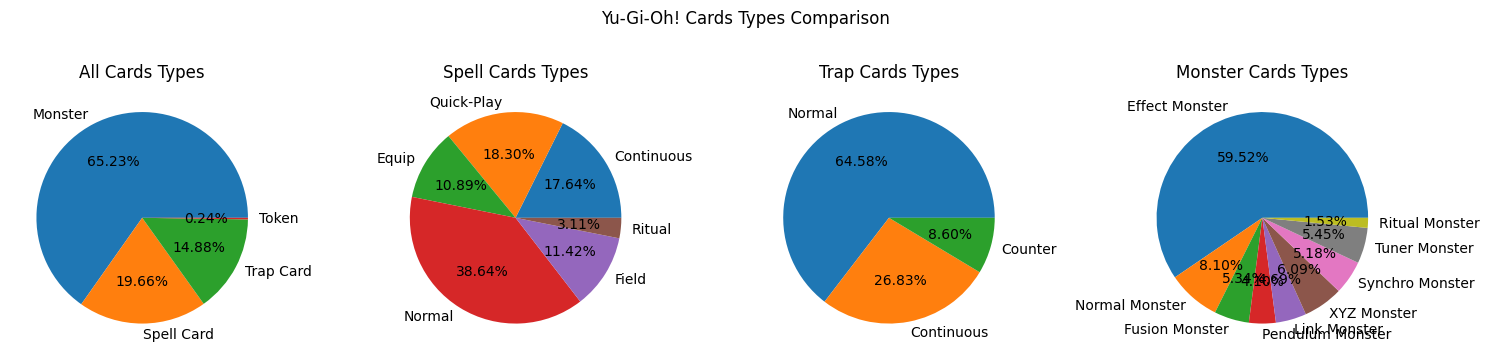

In [62]:
# Menunjukkan pie chart perbandingan jenis kartu Yugioh
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,4))

ax1.pie(monster_card['Type'].value_counts(sort=False), labels=monster_card['Type'].unique(), autopct='%.2f%%')
ax1.set_title('All Cards Types')

ax2.pie(monster_card['Race'][monster_card['Type'].str.contains('Spell')].value_counts(sort=False), 
        labels=monster_card['Race'][monster_card['Type'].str.contains('Spell')].unique(), autopct='%.2f%%')
ax2.set_title('Spell Cards Types')    

ax3.pie(monster_card['Race'][monster_card['Type'].str.contains('Trap')].value_counts(sort=False),
        labels=monster_card['Race'][monster_card['Type'].str.contains('Trap')].unique(), autopct='%.2f%%')
ax3.set_title('Trap Cards Types')

ax4.pie(monster_card_type_others['Type'][monster_card_type_others['Type'].str.contains('Monster')].value_counts(sort=False),
        labels=monster_card_type_others['Type'][monster_card_type_others['Type'].str.contains('Monster')].unique(), autopct='%.2f%%')
ax4.set_title('Monster Cards Types')

plt.suptitle('Yu-Gi-Oh! Cards Types Comparison')
plt.tight_layout()
plt.show()

Jenis kartu Yugioh didominasi oleh Monster Card, diikuti dengan Spell kemudian Trap.

Variasi jenis Spell Card cukup merata selain Normal Spell Card.

Saya rasa perbandingan Trap Card cukup *balance* melihat Trap Card perlu *set up* terlebih dahulu dan bisa diaktifkan pada waktu yang sama dengan Quick-Play Spell serta beberapa Trap perlu syarat untuk mengaktifkannya.

Jumlah Effect Monster tidak mengagetkan karena memang monster Extra Deck (Fusion, Synchro, XYZ, dan Link) membutuhkan monster sebagai *cost* untuk di-*summon*.

*Note: Pie chart Monster Card Types memang agak berbeda rasionya dengan yang di Dashboard karena lebih sulit mengelompokkan datanya di Python.

### 2. Bagaimana perbandingan tipe-tipe Monster per Attribute?

In [63]:
# bikin dataframe baru yang mau diganti 'Illusion', 'Creator-God', 'Divine-Beast' jadi 'Others'
monster_card_race_others = monster_card.copy()

In [64]:
monster_card_race_others['Race'][monster_card_race_others['Type'] == 'Monster'].unique()

array(['Beast', 'Aqua', 'Insect', 'Fish', 'Spellcaster', 'Machine',
       'Warrior', 'Fiend', 'Beast-Warrior', 'Dinosaur', 'Rock', 'Fairy',
       'Dragon', 'Sea Serpent', 'Plant', 'Cyberse', 'Winged Beast',
       'Wyrm', 'Pyro', 'Reptile', 'Zombie', 'Psychic', 'Thunder',
       'Illusion', 'Creator-God', 'Divine-Beast'], dtype=object)

In [65]:
# replace 'Illusion', 'Creator-God', 'Divine-Beast' jadi 'Others'
monster_card_race_others['Race'] = monster_card_race_others['Race'].replace(to_replace=['Creator-God','Divine-Beast','Illusion'], value='Others')

In [66]:
monster_card_race_others['Race'][monster_card_race_others['Type'] == 'Monster'].value_counts()

Race
Warrior          1047
Machine           932
Fiend             783
Spellcaster       682
Dragon            669
Fairy             523
Beast             381
Winged Beast      316
Cyberse           256
Aqua              255
Rock              249
Insect            246
Zombie            243
Beast-Warrior     241
Plant             236
Psychic           178
Reptile           173
Pyro              134
Dinosaur          132
Thunder           129
Fish              116
Wyrm               90
Sea Serpent        84
Others             12
Name: count, dtype: int64

In [67]:
monster_card_race_others['Race'][monster_card_race_others['Type'] == 'Monster'].unique()

array(['Beast', 'Aqua', 'Insect', 'Fish', 'Spellcaster', 'Machine',
       'Warrior', 'Fiend', 'Beast-Warrior', 'Dinosaur', 'Rock', 'Fairy',
       'Dragon', 'Sea Serpent', 'Plant', 'Cyberse', 'Winged Beast',
       'Wyrm', 'Pyro', 'Reptile', 'Zombie', 'Psychic', 'Thunder',
       'Others'], dtype=object)

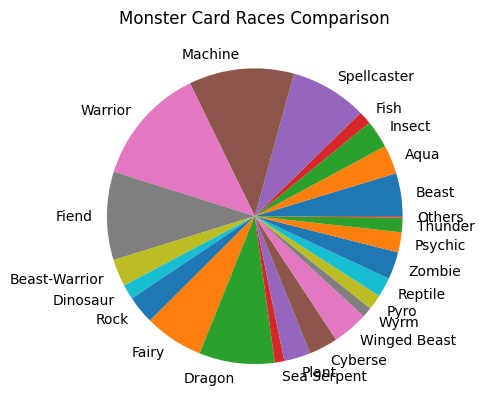

In [68]:
plt.pie(monster_card_race_others['Race'][monster_card_race_others['Type'].str.contains('Monster')].value_counts(sort=False),
        labels=monster_card_race_others['Race'][monster_card_race_others['Type'].str.contains('Monster')].unique())#, autopct='%.2f%%')
plt.title('Monster Card Races Comparison')
plt.show()

Sebagian besar monster Yugioh bertipe Warrior, diikuti Machine, kemudian Fiend, lalu Spellcaster. Memang banyak archetype di Yugioh yang memiliki monster dengan tipe Warrior.

Untuk setiap elemen, perbandingan tipe monster-nya dapat dilihat di bawah ini.

#### FIRE

In [69]:
monster_card_fire = monster_card.copy()
monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].value_counts(sort=False)

Race
Machine           53
Fiend             48
Warrior          114
Cyberse           45
Rock               5
Pyro             119
Fairy             18
Reptile           16
Spellcaster       30
Beast-Warrior     55
Plant             11
Zombie            27
Dragon            51
Beast             17
Insect             5
Winged Beast      18
Aqua              10
Psychic           17
Dinosaur          36
Wyrm              12
Sea Serpent        1
Thunder            5
Illusion           1
Name: count, dtype: int64

In [70]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].value_counts(sort=False):
    if i <= 30:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'FIRE'].unique()[a])
    a += 1

monster_card_fire['Race'] = monster_card_fire['Race'].replace(to_replace = change_others, value='Others')

In [71]:
monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].value_counts(sort=False)

Race
Machine           53
Fiend             48
Warrior          114
Cyberse           45
Others           193
Pyro             119
Beast-Warrior     55
Dragon            51
Dinosaur          36
Name: count, dtype: int64

In [72]:
monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].unique()

array(['Machine', 'Fiend', 'Warrior', 'Cyberse', 'Others', 'Pyro',
       'Beast-Warrior', 'Dragon', 'Dinosaur'], dtype=object)

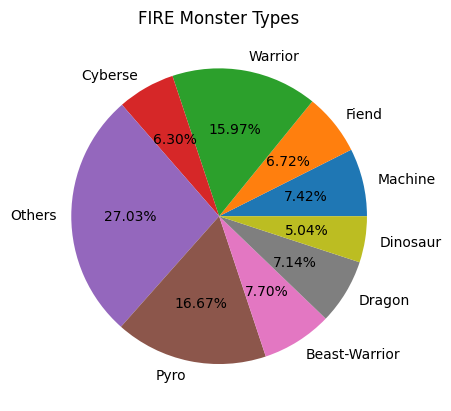

Jumlah FIRE Monster: 714


In [73]:
plt.pie(monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].value_counts(sort=False),
        labels=monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].unique(), autopct='%.2f%%')
plt.title('FIRE Monster Types')
plt.show()

print('Jumlah FIRE Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'FIRE'].nunique())

Pyro monster, tipe yang bertema api, menjadi mayoritas monster berelemen api. Bagus. Banyak juga monster Warrior yang berelemen api.

### WATER

In [74]:
monster_card_water = monster_card.copy()
monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].value_counts(sort=False)

Race
Aqua             221
Fish             109
Sea Serpent       73
Rock               5
Spellcaster       62
Machine           51
Reptile           35
Fairy             27
Beast-Warrior     16
Warrior           54
Psychic           12
Beast             15
Plant             24
Winged Beast      12
Insect             4
Wyrm              12
Fiend             24
Dragon            28
Thunder            4
Dinosaur           9
Cyberse           28
Zombie             8
Name: count, dtype: int64

In [75]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].value_counts(sort=False):
    if i <= 30:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'WATER'].unique()[a])
    a += 1

monster_card_water['Race'] = monster_card_water['Race'].replace(to_replace = change_others, value='Others')

In [76]:
monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].value_counts(sort=False)

Race
Aqua           221
Fish           109
Sea Serpent     73
Others         228
Spellcaster     62
Machine         51
Reptile         35
Warrior         54
Name: count, dtype: int64

In [77]:
monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].unique()

array(['Aqua', 'Fish', 'Sea Serpent', 'Others', 'Spellcaster', 'Machine',
       'Reptile', 'Warrior'], dtype=object)

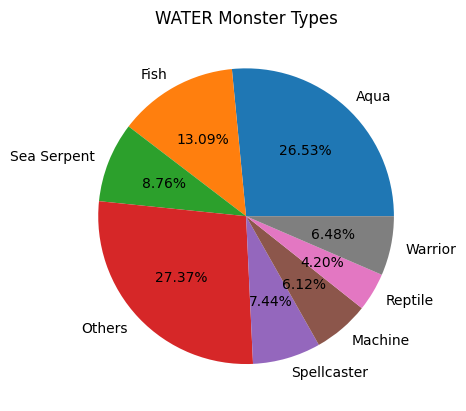

Jumlah WATER Monster: 833


In [78]:
plt.pie(monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].value_counts(sort=False),
        labels=monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].unique(), autopct='%.2f%%')
plt.title('WATER Monster Types')
plt.show()

print('Jumlah WATER Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'WATER'].nunique())

3 tipe terbanyak untuk elemen air diduduki oleh tipe-tipe yang memiliki tema air.

EARTH

In [79]:
monster_card_earth = monster_card.copy()
monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].value_counts(sort=False)

Race
Beast            214
Beast-Warrior     84
Warrior          361
Dinosaur          61
Rock             202
Plant            123
Insect           132
Machine          321
Wyrm              20
Fairy             64
Zombie            38
Reptile           33
Spellcaster       54
Dragon            48
Cyberse           36
Psychic           37
Fiend             34
Winged Beast       7
Thunder           10
Pyro               6
Aqua               6
Fish               2
Sea Serpent        1
Illusion           1
Name: count, dtype: int64

In [80]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].value_counts(sort=False):
    if i <= 50:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'EARTH'].unique()[a])
    a += 1

monster_card_earth['Race'] = monster_card_earth['Race'].replace(to_replace = change_others, value='Others')

In [81]:
monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].value_counts(sort=False)

Race
Beast            214
Beast-Warrior     84
Warrior          361
Dinosaur          61
Rock             202
Plant            123
Insect           132
Machine          321
Others           279
Fairy             64
Spellcaster       54
Name: count, dtype: int64

In [82]:
monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].unique()

array(['Beast', 'Beast-Warrior', 'Warrior', 'Dinosaur', 'Rock', 'Plant',
       'Insect', 'Machine', 'Others', 'Fairy', 'Spellcaster'],
      dtype=object)

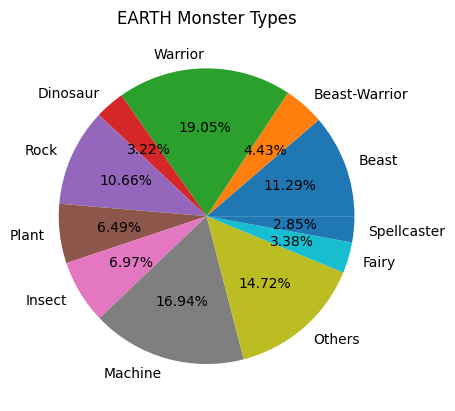

Jumlah EARTH Monster: 1895


In [83]:
plt.pie(monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].value_counts(sort=False),
        labels=monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].unique(), autopct='%.2f%%')
plt.title('EARTH Monster Types')
plt.show()

print('Jumlah EARTH Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'EARTH'].nunique())

Jumlah monster tanah yang menakjubkan. Ditambah bukan tipe Rock yang mendominasi monster berelemen tanah. Hampir 1/5 EARTH Monster bertipe Warrior membuat saya teringat archetype seperti War Rock dan Amazoness.

### WIND

In [84]:
monster_card_wind = monster_card.copy()
monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].value_counts(sort=False)

Race
Insect            45
Dragon           113
Rock               6
Machine          114
Winged Beast     156
Beast             27
Fairy             25
Warrior           63
Fiend             17
Sea Serpent        4
Wyrm               8
Spellcaster       62
Reptile            4
Beast-Warrior     16
Plant             14
Dinosaur           8
Cyberse           13
Psychic           42
Aqua               6
Illusion           1
Pyro               3
Fish               2
Zombie             4
Thunder           19
Name: count, dtype: int64

In [85]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].value_counts(sort=False):
    if i <= 30:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'WIND'].unique()[a])
    a += 1

monster_card_wind['Race'] = monster_card_wind['Race'].replace(to_replace = change_others, value='Others')

In [86]:
monster_card_wind['Race'][monster_card_earth['Attribute'] == 'WIND'].value_counts(sort=False)

Race
Insect           45
Dragon          113
Others          177
Machine         114
Winged Beast    156
Warrior          63
Spellcaster      62
Psychic          42
Name: count, dtype: int64

In [87]:
monster_card_wind['Race'][monster_card_earth['Attribute'] == 'WIND'].unique()

array(['Insect', 'Dragon', 'Others', 'Machine', 'Winged Beast', 'Warrior',
       'Spellcaster', 'Psychic'], dtype=object)

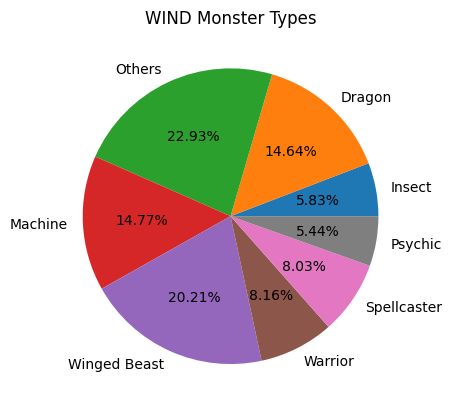

Jumlah WIND Monster: 772


In [88]:
plt.pie(monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].value_counts(sort=False),
        labels=monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].unique(), autopct='%.2f%%')
plt.title('WIND Monster Types')
plt.show()

print('Jumlah WIND Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'WIND'].nunique())

Jumlah monster WIND yang cukup sedikit. Winged Beast, tipe bertema burung, memiliki jumlah monster WIND terbanyak, diikuti tipe Dragon. Nice. Tetapi kenapa posisi ketiga diduduki oleh Machine? Apakah karena archetype Speedroid?

### LIGHT

In [89]:
monster_card_light = monster_card.copy()
monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].value_counts(sort=False)

Race
Machine          170
Warrior          249
Fairy            329
Dragon           171
Reptile           46
Plant             22
Spellcaster      194
Fiend             72
Psychic           47
Beast             73
Dinosaur           5
Cyberse           62
Thunder           78
Rock              14
Insect            21
Beast-Warrior     32
Wyrm              23
Winged Beast      14
Zombie             7
Fish               1
Pyro               4
Sea Serpent        2
Aqua               4
Illusion           1
Name: count, dtype: int64

In [90]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].value_counts(sort=False):
    if i <= 50:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'LIGHT'].unique()[a])
    a += 1

monster_card_light['Race'] = monster_card_light['Race'].replace(to_replace = change_others, value='Others')

In [91]:
monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].value_counts(sort=False)

Race
Machine        170
Warrior        249
Fairy          329
Dragon         171
Others         243
Spellcaster    194
Fiend           72
Beast           73
Cyberse         62
Thunder         78
Name: count, dtype: int64

In [92]:
monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].unique()

array(['Machine', 'Warrior', 'Fairy', 'Dragon', 'Others', 'Spellcaster',
       'Fiend', 'Beast', 'Cyberse', 'Thunder'], dtype=object)

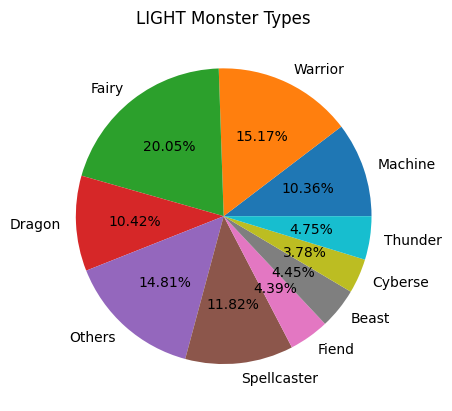

Jumlah LIGHT Monster: 1641


In [93]:
plt.pie(monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].value_counts(sort=False),
        labels=monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].unique(), autopct='%.2f%%')
plt.title('LIGHT Monster Types')
plt.show()

print('Jumlah LIGHT Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'LIGHT'].nunique())

Jumlah monster LIGHT yang banyak. Didominasi oleh tipe Fairy; cocok. Diikuti oleh Warrior; ok.

DARK

In [94]:
monster_card_dark = monster_card.copy()
monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].value_counts(sort=False)

Race
Insect            39
Beast             39
Spellcaster      280
Fiend            595
Dragon           259
Machine          230
Cyberse           72
Fairy             62
Reptile           39
Psychic           23
Beast-Warrior     38
Zombie           161
Wyrm              15
Warrior          207
Plant             43
Winged Beast     111
Rock              17
Pyro               3
Sea Serpent        3
Illusion           2
Aqua               9
Dinosaur          13
Fish               2
Thunder           14
Name: count, dtype: int64

In [95]:
# Menentukan Race mana yang akan masuk ke Others
change_others = []
a = 0
for i in monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].value_counts(sort=False):
    if i <= 50:
        change_others.append(monster_card['Race'][monster_card['Attribute'] == 'DARK'].unique()[a])
    a += 1

monster_card_dark['Race'] = monster_card_dark['Race'].replace(to_replace = change_others, value='Others')

In [96]:
monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].value_counts(sort=False)

Race
Others          299
Spellcaster     280
Fiend           595
Dragon          259
Machine         230
Cyberse          72
Fairy            62
Zombie          161
Warrior         207
Winged Beast    111
Name: count, dtype: int64

In [97]:
monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].unique()

array(['Others', 'Spellcaster', 'Fiend', 'Dragon', 'Machine', 'Cyberse',
       'Fairy', 'Zombie', 'Warrior', 'Winged Beast'], dtype=object)

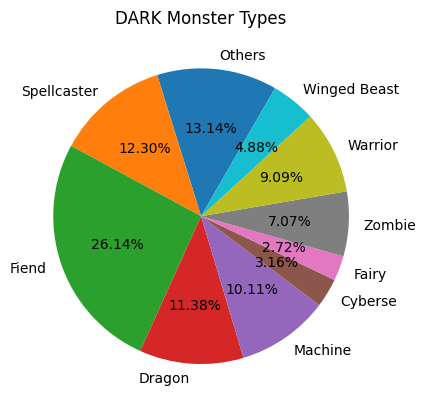

Jumlah DARK Monster: 2276


In [98]:
plt.pie(monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].value_counts(sort=False),
        labels=monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].unique(), autopct='%.2f%%', startangle=60)
plt.title('DARK Monster Types')
plt.show()

print('Jumlah DARK Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'DARK'].nunique())

Elemen dengan jumlah monster terbanyak. Didominasi oleh Fiend dan memiliki rasio yang paling besar dibandingkan elemen-elemen sebelumnya. Diikuti oleh Spellcaster dan Dragon; menarik. Sepertinya Konami harus sementara menghentikan pembuatan kartu monster DARK Fiend.

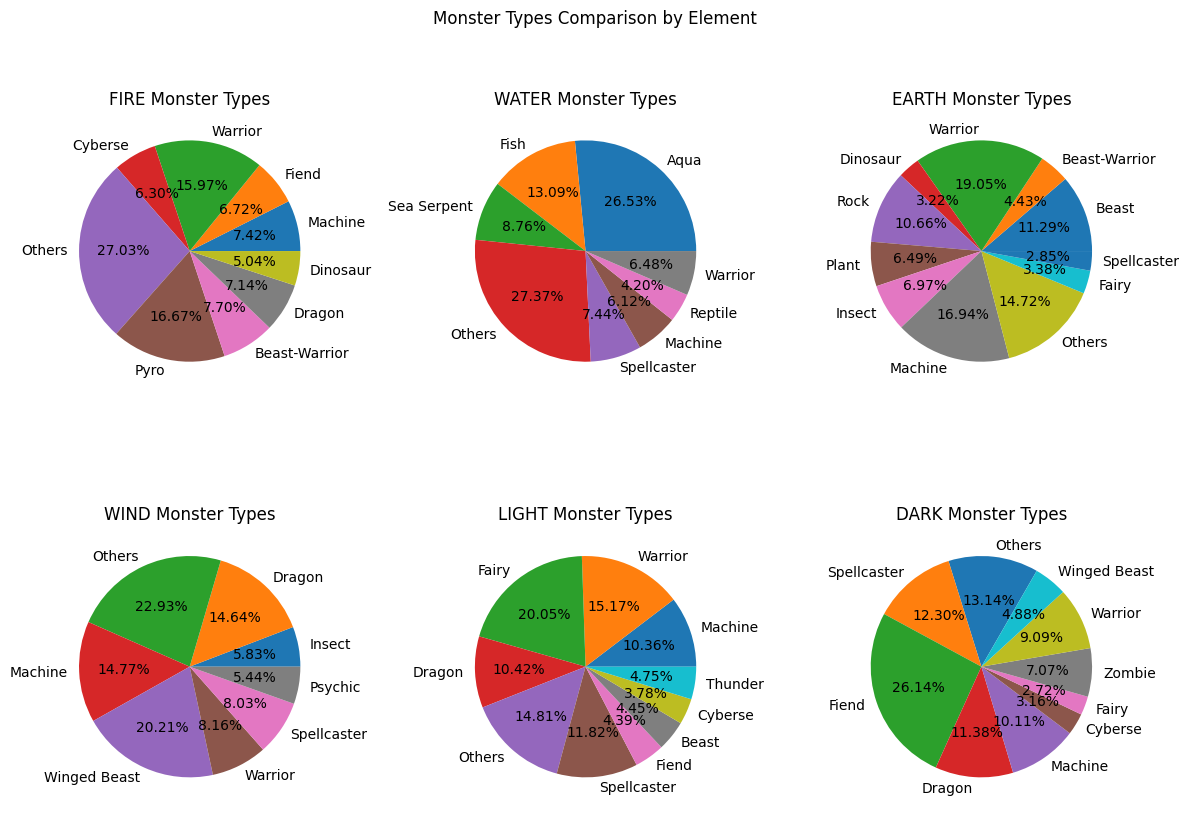

Jumlah FIRE Monster: 714
Jumlah WATER Monster: 833
Jumlah EARTH Monster: 1895
Jumlah WIND Monster: 772
Jumlah LIGHT Monster: 1641
Jumlah DARK Monster: 2276


In [99]:
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(12, 9))

ax1.pie(monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].value_counts(sort=False),
        labels=monster_card_fire['Race'][monster_card_fire['Attribute'] == 'FIRE'].unique(), autopct='%.2f%%')
ax1.set_title('FIRE Monster Types')

ax2.pie(monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].value_counts(sort=False),
        labels=monster_card_water['Race'][monster_card_water['Attribute'] == 'WATER'].unique(), autopct='%.2f%%')
ax2.set_title('WATER Monster Types')

ax3.pie(monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].value_counts(sort=False),
        labels=monster_card_earth['Race'][monster_card_earth['Attribute'] == 'EARTH'].unique(), autopct='%.2f%%')
ax3.set_title('EARTH Monster Types')

ax4.pie(monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].value_counts(sort=False),
        labels=monster_card_wind['Race'][monster_card_wind['Attribute'] == 'WIND'].unique(), autopct='%.2f%%')
ax4.set_title('WIND Monster Types')

ax5.pie(monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].value_counts(sort=False),
        labels=monster_card_light['Race'][monster_card_light['Attribute'] == 'LIGHT'].unique(), autopct='%.2f%%')
ax5.set_title('LIGHT Monster Types')

ax6.pie(monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].value_counts(sort=False),
        labels=monster_card_dark['Race'][monster_card_dark['Attribute'] == 'DARK'].unique(), autopct='%.2f%%', startangle=60)
ax6.set_title('DARK Monster Types')

plt.suptitle('Monster Types Comparison by Element')
plt.tight_layout()
plt.show()

print('Jumlah FIRE Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'FIRE'].nunique())
print('Jumlah WATER Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'WATER'].nunique())
print('Jumlah EARTH Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'EARTH'].nunique())
print('Jumlah WIND Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'WIND'].nunique())
print('Jumlah LIGHT Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'LIGHT'].nunique())
print('Jumlah DARK Monster:', monster_card_fire['Card_ID'][monster_card_fire['Attribute'] == 'DARK'].nunique())

Kelihatannya Konami terlalu banyak membuat kartu DARK Monster dan perlu memperbanyak FIRE, WATER, dan WIND Monster.

### 3. Apakah kartu-kartu yang *overpriced* adalah kartu-kartu yang relatif baru dirilis?

Catatan: Kartu-kartu yang belum atau baru dirilis belum memiliki harga di setiap marketplace.

Akan dicari outlier dari Lowest Price Dataframe untuk dijadikan sebagai patokan harga yang *overpriced*.

In [100]:
lowest_price.describe()

,Card_ID,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
count,1.242900e+04,12429.000000,12429.000000,12429.000000,12429.000000,12429.000000,12429
mean,4.951197e+07,1.043629,1.088114,4.449339,3.961158,1.406252,2013-01-02 04:26:28.414192640
min,2.511000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1999-02-04 00:00:00
25%,2.434880e+07,0.080000,0.130000,0.990000,0.250000,0.250000,2008-02-23 00:00:00
50%,4.914411e+07,0.140000,0.200000,1.290000,0.980000,0.390000,2014-02-15 00:00:00
75%,7.439385e+07,0.320000,0.410000,2.940000,2.000000,0.790000,2018-10-13 00:00:00
max,1.012031e+08,999.990000,999.990000,999.990000,999.990000,999.990000,2023-10-28 00:00:00
std,2.890359e+07,11.153895,15.715631,32.163101,21.246874,11.798167,NaN


In [101]:
pd.DataFrame(
    {'':['cardmarket', 'tcgplayer', 'ebay', 'amazon', 'coolstuffinc'],
    'Skew':[lowest_price['Cardmarket'].skew(), lowest_price['TCGPlayer'].skew(), lowest_price['Ebay'].skew(), lowest_price['Amazon'].skew(), lowest_price['CoolStuffInc'].skew()],
    'Kurtosis':[lowest_price['Cardmarket'].kurtosis(), lowest_price['TCGPlayer'].kurtosis(), lowest_price['Ebay'].kurtosis(), lowest_price['Amazon'].kurtosis(), lowest_price['CoolStuffInc'].kurtosis()]
    }
)

,,Skew,Kurtosis
0,cardmarket,63.700848,5303.320315
1,tcgplayer,57.853580,3569.733780
2,ebay,25.829048,739.492109
3,amazon,25.064777,848.593287
4,coolstuffinc,59.457491,4506.661561


Tentu saja dataset-nya tidak normal.

In [135]:
import numpy as np

Penghitungan Confidence Interval :

In [160]:
cardmarket_upbound = lowest_price['Cardmarket'].quantile(0.5) + 1.7*(1.25*(lowest_price['Cardmarket'].quantile(0.75) - 
                                                        lowest_price['Cardmarket'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Cardmarket']))))
cardmarket_lowbound = lowest_price['Cardmarket'].quantile(0.5) - 1.7*(1.25*(lowest_price['Cardmarket'].quantile(0.75) - 
                                                        lowest_price['Cardmarket'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Cardmarket']))))
print('Cardmarket')
print('Upper bound:', cardmarket_upbound)
print('Lower bound:', cardmarket_lowbound)

tcgplayer_upbound = lowest_price['TCGPlayer'].quantile(0.5) + 1.7*(1.25*(lowest_price['TCGPlayer'].quantile(0.75) - 
                                                        lowest_price['TCGPlayer'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['TCGPlayer']))))
tcgplayer_lowbound = lowest_price['TCGPlayer'].quantile(0.5) - 1.7*(1.25*(lowest_price['TCGPlayer'].quantile(0.75) - 
                                                        lowest_price['TCGPlayer'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['TCGPlayer']))))
print('\nTCGPlayer')
print('Upper bound:', tcgplayer_upbound)
print('Lower bound:', tcgplayer_lowbound)

ebay_upbound = lowest_price['Ebay'].quantile(0.5) + 1.7*(1.25*(lowest_price['Ebay'].quantile(0.75) - 
                                                        lowest_price['Ebay'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Ebay']))))
ebay_lowbound = lowest_price['Ebay'].quantile(0.5) - 1.7*(1.25*(lowest_price['Ebay'].quantile(0.75) - 
                                                        lowest_price['Ebay'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Ebay']))))
print('\nEbay')
print('Upper bound:', ebay_upbound)
print('Lower bound:', ebay_lowbound)
amazon_upbound = lowest_price['Amazon'].quantile(0.5) + 1.7*(1.25*(lowest_price['Amazon'].quantile(0.75) - 
                                                        lowest_price['Amazon'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Amazon']))))
amazon_lowbound = lowest_price['Amazon'].quantile(0.5) - 1.7*(1.25*(lowest_price['Amazon'].quantile(0.75) - 
                                                        lowest_price['Amazon'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['Amazon']))))
print('\nAmazon')
print('Upper bound:', amazon_upbound)
print('Lower bound:', amazon_lowbound)


coolstuffinc_upbound = lowest_price['CoolStuffInc'].quantile(0.5) + 1.7*(1.25*(lowest_price['CoolStuffInc'].quantile(0.75) - 
                                                        lowest_price['CoolStuffInc'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['CoolStuffInc']))))
coolstuffinc_lowbound = lowest_price['CoolStuffInc'].quantile(0.5) - 1.7*(1.25*(lowest_price['CoolStuffInc'].quantile(0.75) - 
                                                        lowest_price['CoolStuffInc'].quantile(0.25)) / 1.35*(np.sqrt(len(lowest_price['CoolStuffInc']))))
print('\nCoolStuffInc')
print('Upper bound:', coolstuffinc_upbound)
print('Lower bound:', coolstuffinc_lowbound)

Cardmarket
Upper bound: 42.256716132407306
Lower bound: -41.976716132407304

TCGPlayer
Upper bound: 49.33616882114186
Lower bound: -48.936168821141855

Ebay
Upper bound: 343.48831857580933
Lower bound: -340.9083185758093

Amazon
Upper bound: 308.0810551321366
Lower bound: -306.1210551321366

CoolStuffInc
Upper bound: 95.15261129791644
Lower bound: -94.37261129791644


#### Cardmarket

In [146]:
lowest_price[(lowest_price['Cardmarket'] > cardmarket_upbound)].sort_values('Cardmarket', ascending=False)[:5]#.sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
9703,3627449,Skull Guardian,Guardian,304.25,135.00,10.00,405.78,179.99,2000-03-23
7555,662854,Noritoshi in Darkest Rainment,None,300.00,0.00,15.00,0.72,0.00,2018-08-05
11878,56413937,Warrior of Tradition,None,218.36,98.71,10.00,6.35,139.99,1999-07-05
9452,76232340,Sengenjin,None,194.93,3.31,20.00,7.85,4.99,1999-08-26


In [148]:
lowest_price[(lowest_price['Cardmarket'] > cardmarket_upbound)].sort_values('Cardmarket', ascending=False)[:20].sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
11312,35269904,Triple Tactics Thrust,None,62.74,68.61,61.00,0.00,89.99,2022-10-15
5991,81497285,Lady Labrynth of the Silver Castle,Labrynth,119.14,22.31,24.99,1.09,13.99,2022-07-16
11749,56099748,Visas Starfrost,None,183.34,21.80,34.99,0.25,17.99,2022-01-15
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
7555,662854,Noritoshi in Darkest Rainment,None,300.00,0.00,15.00,0.72,0.00,2018-08-05
289,662855,Amatsu-Okami of the Divine Peaks,None,52.18,0.00,442.00,4.24,0.00,2018-08-05
1210,38517737,Blue-Eyes Alternative White Dragon,Blue-Eyes,150.47,8.39,3.60,7.33,9.99,2015-12-12
1190,30757396,Blood Mefist,None,61.41,999.99,999.99,1.21,0.00,2010-11-20
8444,75917088,Princess Pikeru,None,56.02,0.23,149.99,1.27,29.99,2005-11-17


Kartu-kartu termahal di Cardmarket sekitar 3/4-nya merupakan kartu-kartu yang lawas dan 1/4-nya lagi merupakan kartu-kartu yang cukup baru. Harga yang tercantum adalah dalam Euro. 

Beberapa kartu mahal yang ada di atas ini adalah kartu yang cukup sering dimainkan saat ini, seperti Triple Tactics Thrust, Lady Labrynth of the Silver Castle, dan Visas Starfrost.

Ten Thousand Dragon adalah salah kartu ikonik YuGiOh yang ID, ATK, dan lainnya dibuat 10.000.

Blue-Eyes Alternative White Dragon juga bisa dikatakan ikonik karena kartu ini merupakan salah satu monster terbaik di Deck Blue-Eyes.

#### TCGPlayer

In [149]:
lowest_price[(lowest_price['TCGPlayer'] > tcgplayer_upbound)].sort_values('TCGPlayer', ascending=False)[:5]#.sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
1190,30757396,Blood Mefist,None,61.41,999.99,999.99,1.21,0.00,2010-11-20
3222,60025883,"Duel Link Dragon, the Duel Dragon",Power Tool,6.20,919.99,929.99,2.77,0.00,2019-03-09
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
3362,11502550,Elemental HERO Air Neos,Elemental HERO,41.94,148.73,349.99,0.89,0.00,2007-03-15


In [150]:
lowest_price[(lowest_price['TCGPlayer'] > tcgplayer_upbound)].sort_values('TCGPlayer', ascending=False)[:20].sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
8986,97682931,Revolution Synchron,Synchro,0.00,56.74,4.00,0.00,69.99,2023-04-22
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
1621,22850702,Chaos Angel,Chaos,49.06,62.17,44.99,0.00,54.99,2023-01-14
11312,35269904,Triple Tactics Thrust,None,62.74,68.61,61.00,0.00,89.99,2022-10-15
10757,32731036,The Bystial Lubellion,Bystial,49.96,51.90,74.99,1.00,69.99,2022-07-16
835,84815190,Baronne de Fleur,Fleur,50.90,60.81,52.98,113.70,54.99,2021-05-22
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
3222,60025883,"Duel Link Dragon, the Duel Dragon",Power Tool,6.20,919.99,929.99,2.77,0.00,2019-03-09
1190,30757396,Blood Mefist,None,61.41,999.99,999.99,1.21,0.00,2010-11-20
3362,11502550,Elemental HERO Air Neos,Elemental HERO,41.94,148.73,349.99,0.89,0.00,2007-03-15


Mirip seperti Cardmarket, di TCGPlayer sekitar setengah kartu-kartu termahalnya adalah kartu yang relatif baru sedangkan setengahnya lagi adalah kartu-kartu lawas. Selain di Cardmarket, mata uang yang digunakan adalah USD. 

Kartu yang cukup sering dimainkan di sini, selain yang sudah disebutkan di Cardmarket, adalah Chaos Angel, The Bystial Lubellion, Baronne de Fleur, dan Revolution Synchron. Kartu-kartu ini adalah kartu yang generik dan *impactful* sehingga sering dipakai saat ini.

#### EBay

In [151]:
lowest_price[(lowest_price['Ebay'] > ebay_upbound)].sort_values('Ebay', ascending=False)[:5]#.sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
12037,8843569,Wing Requital,None,0.69,0.44,999.99,2.24,0.49,2021-06-26
5255,10000040,Holactie the Creator of Light,None,0.00,0.00,999.99,12.86,0.00,2011-12-10
1190,30757396,Blood Mefist,None,61.41,999.99,999.99,1.21,0.00,2010-11-20
1896,62777823,CONTAIN!,Rescue-ACE,0.11,0.12,999.99,10.18,0.39,2022-08-20
2990,84916669,Doriado,Doriado,0.00,0.00,999.99,3.03,0.00,1999-07-05


In [152]:
lowest_price[(lowest_price['Ebay'] > ebay_upbound)].sort_values('Ebay', ascending=False)[:30].sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
1896,62777823,CONTAIN!,Rescue-ACE,0.11,0.12,999.99,10.18,0.39,2022-08-20
12037,8843569,Wing Requital,None,0.69,0.44,999.99,2.24,0.49,2021-06-26
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
3222,60025883,"Duel Link Dragon, the Duel Dragon",Power Tool,6.20,919.99,929.99,2.77,0.00,2019-03-09
289,662855,Amatsu-Okami of the Divine Peaks,None,52.18,0.00,442.00,4.24,0.00,2018-08-05
4524,27491571,Ghostrick Witch,Ghostrick,0.11,0.37,450.00,1.31,0.25,2013-07-20
6402,10000030,Magi Magi ☆ Magician Gal,None,0.00,0.00,699.99,2.54,0.00,2011-12-12
5255,10000040,Holactie the Creator of Light,None,0.00,0.00,999.99,12.86,0.00,2011-12-10
1190,30757396,Blood Mefist,None,61.41,999.99,999.99,1.21,0.00,2010-11-20


Pemasangan harga yang tidak masuk akal di EBay.

Holactie the Creator of Light adalah juga salah satu kartu ikonik di YuGiOh, maka cukup wajar dipasang harga yang ekstrim. Tetapi kartu-kartu yang cukup baru juga dipasang dengan harga yang ekstrim. Kemungkinan harga tersebut hanya untuk dipajang dan bisa ditawar.

#### Amazon

In [153]:
lowest_price[(lowest_price['Amazon'] > amazon_upbound)].sort_values('Amazon', ascending=False)[:5]#.sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
4331,25833572,Gate Guardian,Gate Guardian,10.61,0.13,1.58,999.99,0.79,1999-08-26
2935,60303688,"Dogmatika Ecclesia, the Virtuous",Dogmatika,4.27,2.32,5.50,767.77,4.99,2020-04-18
1332,20101223,Breath of Light,None,83.33,98.99,5.00,699.99,79.99,1999-07-22
8915,42303365,Reptilianne Viper,Reptilianne,0.17,0.66,1.91,600.78,0.39,2009-07-18
4944,11321089,Guardian Chimera,Guardian,21.79,24.43,7.99,599.99,9.99,2021-10-16


In [155]:
lowest_price[(lowest_price['Amazon'] > amazon_upbound)].sort_values('Amazon', ascending=False).sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
4944,11321089,Guardian Chimera,Guardian,21.79,24.43,7.99,599.99,9.99,2021-10-16
6418,72171665,Magical Broker,None,0.04,0.05,0.99,399.99,0.49,2020-08-08
2935,60303688,"Dogmatika Ecclesia, the Virtuous",Dogmatika,4.27,2.32,5.50,767.77,4.99,2020-04-18
3224,37469904,Duelist Alliance,Magician,0.05,0.11,2.09,457.98,0.25,2017-01-14
8915,42303365,Reptilianne Viper,Reptilianne,0.17,0.66,1.91,600.78,0.39,2009-07-18
9703,3627449,Skull Guardian,Guardian,304.25,135.00,10.00,405.78,179.99,2000-03-23
4331,25833572,Gate Guardian,Gate Guardian,10.61,0.13,1.58,999.99,0.79,1999-08-26
1332,20101223,Breath of Light,None,83.33,98.99,5.00,699.99,79.99,1999-07-22
6911,9293977,Metal Dragon,None,0.43,0.29,3.95,599.99,1.99,1999-05-27
11997,92391084,Wilmee,None,25.36,32.78,17.99,499.99,29.99,1999-05-25


Harga kartu-kartu yang di pasang di Amazon sepertinya sangat tinggi hingga hanya segini kartu yang dianggap *overprice*. Kartu-kartu yang dirilis di tahun 2000 ke belakang memang kartu lawas sehingga dijual untuk kolektor saja. Kartu yang bisa dibilang relevan saat ini yang termasuk *overprice* hanya Guardian Chimera dan Dogmatika Ecclesia, the Virtuous.

#### Cool Stuff Inc.

In [156]:
lowest_price[(lowest_price['CoolStuffInc'] > coolstuffinc_upbound)].sort_values('CoolStuffInc', ascending=False)[:5]#.sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
4317,90844184,Garma Sword,None,65.94,81.79,2.75,0.79,499.99,2000-07-13
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
3448,39897277,Elf's Light,None,16.76,96.65,169.97,0.69,179.99,1999-05-25
9703,3627449,Skull Guardian,Guardian,304.25,135.00,10.00,405.78,179.99,2000-03-23


In [158]:
lowest_price[(lowest_price['CoolStuffInc'] > coolstuffinc_upbound)].sort_values('CoolStuffInc', ascending=False).sort_values('OCG_Release_Date', ascending=False)

,Card_ID,Name,Archetype,Cardmarket,TCGPlayer,Ebay,Amazon,CoolStuffInc,OCG_Release_Date
6481,15845914,Magicians of Bonds and Unity,None,182.95,204.54,830.00,0.00,399.99,2023-04-22
10963,10604644,"Therion ""King"" Regulus",Therion,33.07,29.83,48.99,0.25,149.99,2022-01-15
10678,10000,Ten Thousand Dragon,None,999.99,999.99,999.99,1.00,999.99,2019-10-12
4317,90844184,Garma Sword,None,65.94,81.79,2.75,0.79,499.99,2000-07-13
9703,3627449,Skull Guardian,Guardian,304.25,135.00,10.00,405.78,179.99,2000-03-23
7558,43694075,Novox's Prayer,None,84.41,38.54,89.99,145.34,139.99,2000-03-23
11878,56413937,Warrior of Tradition,None,218.36,98.71,10.00,6.35,139.99,1999-07-05
951,16899564,Beautiful Headhuntress,None,175.08,67.48,9.00,101.85,129.99,1999-07-05
3448,39897277,Elf's Light,None,16.76,96.65,169.97,0.69,179.99,1999-05-25


Jumlah outlier yang tidak banyak. hampir semuanya kartu-kartu lawas. Hanya kartu Therion "King" Regulus saja yang saat ini relevan dimainkan. Batas atas outlier-nya juga termasuk rendah di Cool Stuff Inc.

**Jadi, kartu-kartu overprice sebagian adalah kartu lawas yang kemungkinan akan diincar oleh kolektor, sisanya adalah kartu-kartu yang cukup relevan untuk dimainkan dan relatif baru.**

Jika diperhatikan, kartu Magicians of Bonds and Unity selalu muncul sebagai kartu yang *overpriced*. Kemungkinan kartu ini merupakan kartu promo dan bergambar Dark Magician, monster andalan Yugi di *anime* YuGiOh.

### 4. Berapa rata-rata banyak kartu dalam satu Archetype?

Archetype dengan jumlah kartu kurang dari 3 tidak akan diikutkan dalam analisis karena waktu yang sempit. Jika ada waktu, data akan dibersihkan terlebih dahulu lalu dilakukan analisis lebih lanjut.

In [113]:
card_in_arch = card_df.groupby('Archetype').agg({'Name':'count'})

In [168]:
card_in_arch[card_in_arch['Name'] > 500]

,Name
Archetype,
No Archetype,5169


In [169]:
len(card_in_arch[card_in_arch['Name'] <= 500])

494

In [182]:
len(card_in_arch[(card_in_arch['Name'] > 1) & (card_in_arch['Name'] <= 500)])

444

In [183]:
card_in_arch[(card_in_arch['Name'] > 1) & (card_in_arch['Name'] <= 500)].mean()

Name    16.238739
dtype: float64

In [184]:
card_in_arch[card_in_arch['Name'] <= 500].mean()

Name    14.696356
dtype: float64

Apakah secara statistik merepresentasikan seluruh dataset?

Dengan Paired Test, misal A tidak memasukkan archetype yang jumlah kartunya 1, B memasukkan seluruh archetype.

$H_0$ : $\mu$ _A $=$ $\mu$ _B

$H_1$ :  $\mu$ _A $\neq$  $\mu$ _B

Ukuran sample ditentukan dengan bantuan website berikut. https://www.qualtrics.com/au/experience-management/research/determine-sample-size/?rid=ip&prevsite=en&newsite=au&geo=ID&geomatch=au

In [185]:
from scipy import stats

t_stat,p_val = stats.ttest_rel(card_in_arch[(card_in_arch['Name'] > 1) & (card_in_arch['Name'] <= 500)].sample(200), 
                                card_in_arch[card_in_arch['Name'] <= 500].sample(200)) # memakai jumlah sampel 220 agar ukurannya sama
print('P-value:',p_val)

P-value: [0.20793701]


Karena p-value < 0.05, maka $H_0$ tidak ditolak. Jadi analisis dapat menggunakan data yang tidak mengandung jumlah kartu dalam archetype kurang dari 1.

**Maka, sebaiknya Archetype yang hanya memiliki 1 kartu dijadikan No Archetype saja.**

### 5. Bagaimana perbandingan jumlah kartu dari setiap *rarity*?

In [119]:
rarity['Rarity'].value_counts(sort=False)

Rarity
Common                                     15981
Quarter Century Secret Rare                   23
Ultra Rare                                  4018
Super Rare                                  4438
Rare                                        3644
Unknown                                      371
Short Print                                  522
Shatterfoil Rare                             297
Duel Terminal Normal Parallel Rare           594
Ultimate Rare                                745
Secret Rare                                 2060
Mosaic Rare                                  215
Gold Secret Rare                              98
Gold Rare                                    330
Starfoil Rare                                441
Collector's Rare                             135
Starlight Rare                                87
Premium Gold Rare                            147
Prismatic Secret Rare                        213
Starfoil                                      49
Duel Terminal

In [120]:
rarity['Rarity'].unique()

array(['Common', 'Quarter Century Secret Rare', 'Ultra Rare',
       'Super Rare', 'Rare', 'Unknown', 'Short Print', 'Shatterfoil Rare',
       'Duel Terminal Normal Parallel Rare', 'Ultimate Rare',
       'Secret Rare', 'Mosaic Rare', 'Gold Secret Rare', 'Gold Rare',
       'Starfoil Rare', "Collector's Rare", 'Starlight Rare',
       'Premium Gold Rare', 'Prismatic Secret Rare', 'Starfoil',
       'Duel Terminal Rare Parallel Rare',
       'Duel Terminal Super Parallel Rare',
       'Duel Terminal Ultra Parallel Rare', 'Extra Secret Rare',
       'Ghost Rare', 'Normal Parallel Rare', 'QCScR', 'Platinum Rare',
       'Ultra Parallel Rare', "Ultra Rare (Pharaoh's Rare)",
       'Ghost/Gold Rare', 'Platinum Secret Rare', 'Super Short Print',
       'Super Parallel Rare', 'Ultra Secret Rare', 'Extra Secret',
       'Duel Terminal Normal Rare Parallel Rare', 'Super',
       '10000 Secret Rare'], dtype=object)

In [121]:
rarity_others = rarity.copy()

In [122]:
# Menentukan Rarity mana yang akan masuk ke Others
change_others = []
a = 0
for i in rarity_others['Rarity'].value_counts(sort=False):
    if i <= 400:
        change_others.append(rarity_others['Rarity'].unique()[a])
    a += 1

rarity_others['Rarity'] = rarity_others['Rarity'].replace(to_replace = change_others, value='Others')

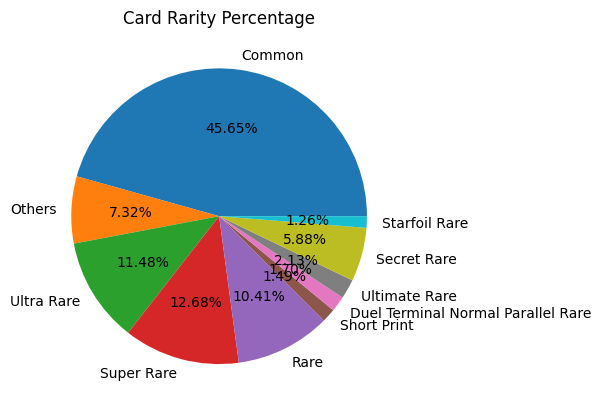

In [123]:
plt.pie(rarity_others['Rarity'].value_counts(sort=False),
        labels=rarity_others['Rarity'].unique(), autopct='%.2f%%')
plt.title('Card Rarity Percentage')
plt.show()

In [124]:
len(rarity[rarity['Rarity'] == 'Common'])

15981

Mayoritas rarity kartu YuGiOh yang ada adalah Common, kartu yang di-print secara normal tanpa *foil*. Biasanya tidak berharga. Jumlah Super Rare dan Ultra Rare yang melebihi kartu Rare memicu pertanyaan.

### 6. Bagaimana dengan jumlah monster dari setiap level?

In [125]:
card_df['Level/Rank'].value_counts()

Level/Rank
nan         4292
4           2381
3           1159
8            689
2            681
1            642
6            619
5            610
7            471
No level     380
10           253
9            146
12            66
11            33
0              6
13             1
Name: count, dtype: int64

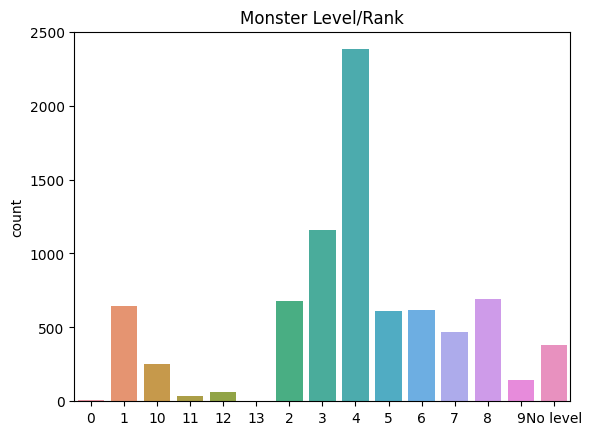

In [134]:
sns.barplot(y = card_df['Level/Rank'][(~card_df['Level/Rank'].str.contains('nan'))].sort_values().value_counts(sort=False), 
            x = card_df['Level/Rank'][(~card_df['Level/Rank'].str.contains('nan'))].sort_values().unique())
plt.title('Monster Level/Rank')
plt.show()

Mayoritas level monster di bawah level 5. "Boss monster" di Yu-Gi-Oh! biasanya memiliki level 6 ke atas, jadi masuk akal jika monster level 4 ke bawah dianggap sebagai "batu pijakan" menuju "Boss Monster". Tetapi jumlah monster di grafik ini juga dipengaruhi oleh jumlah monster XYZ yang level-nya disebut Rank. Bisa juga jumlah level/rank 4 dikarenakan jumlah Monster XYZ Rank 4 yang banyak.

---
## E. Kesimpulan
---

Konami mencetak kartu Yu-Gi-Oh! dengan rasio Monster yang paling banyak menunjukkan Konami ingin permainan ini lebih banyak menggunakan Monster daripada Spell atau Trap. Tetapi melihat jumlah Monster DARK Fiend yang sangat banyak, sepertinya Konami harus sementara menjauhi pembuatan kartu DARK atau Fiend. Melihat rarity kartu-kartu Yu-Gi-Oh!, mengingat kartu yang kuat biasanya minimal ber-rarity Rare, saya semakin yakin Yu-Gi-Oh! adalah permainan kartu yang mahal. Melihat kisaran harga kartu-kartu yang dijual di marketplace pilihan YGOPRODeck, tambah yakin lagi Yu-Gi-Oh! adalah permainan yang mahal.